# Readmittance Rate for Diabetes Treatment

## Objective: 
Identify certain factors that affect the rate at which diabetes patients are readmitted to impatient care with the goal of improving treatment and patient outcomes. 

## The Data Set:
This dataset represents 10 years worth of clinical care data spanning from 1998 - 2008 for patients being treated for diabetes and was taken from a national data warehouse that collects comprehensive clinical records across hospitals throughout the United States. The data contains info from 130 U.S. hospitals and contains over 50 features spanning from age, race, gender, time in hospital, the number of lab tests perfromed, the number of diagnoses, as well as over 20 different medications that may have been administered. In order to be included in this dataset, certain criteria had to be met:
    1. It is an inpatient encounter (a hospital admission).
    2. It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.
    3. The length of stay was at least 1 day and at most 14 days.
    4. Laboratory tests were performed during the encounter.
    5. Medications were administered during the encounter. 
The most important feature I will be examining however, is readmission. Patients are either readmitted in less than 30 days, greater than 30 days or not readmitted at all. The goal will be to identify specific factors pertaining to patient care that correlate to either higher or lower readmittance rates. By finding these factors, hospitals and caretakers will be able to focus on these specific areas in diabetes treatment, leading to improved patient outcomes.

## Data Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
diabetic_data = pd.read_csv(r'\Users\mike1\Documents\diabetic_data.csv')

diabetes = diabetic_data.sample(n = 10000)

The first bit of information I wanted to gather was on the readmittance rates. I have drawn a sample of 10,000 patients and we see that in the sample, just over 53 percent of patients are not readmitted. Of the remaining patients, 35 percent are readmitted in over 30 days. The rest are readmitted in under 30 days.  

Readmittance percentage 
 NO     0.5374
>30    0.3506
<30    0.1120
Name: readmitted, dtype: float64


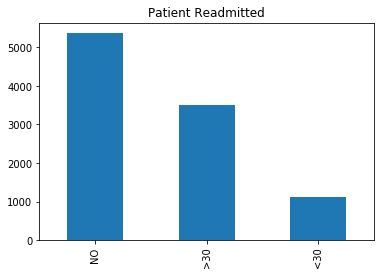

In [3]:
diabetes['readmitted'].value_counts().plot.bar(title = "Patient Readmitted")
print("Readmittance percentage \n", diabetes['readmitted'].value_counts()/10000)

### Patient Demographics
Next, I wanted to get a feel for the demographics of the patient population. From the charts below, we see that about 90 percent of the patient data is for individuals over 40. Also, the vast majority of patients are Caucasian (over 70%), with the remaining percentage being predominantly African American. Finally, females are slightly more represented than males (54% to 46%). 

Summary of Age, Race and Gender
Age percentage 
 [70-80)     0.2523
[60-70)     0.2262
[50-60)     0.1694
[80-90)     0.1666
[40-50)     0.0943
[30-40)     0.0372
[90-100)    0.0280
[20-30)     0.0165
[10-20)     0.0080
[0-10)      0.0015
Name: age, dtype: float64
Race percentage 
 Caucasian          0.7506
AfricanAmerican    0.1856
?                  0.0222
Hispanic           0.0202
Other              0.0158
Asian              0.0056
Name: race, dtype: float64
Gender percentage 
 Female             0.5275
Male               0.4724
Unknown/Invalid    0.0001
Name: gender, dtype: float64


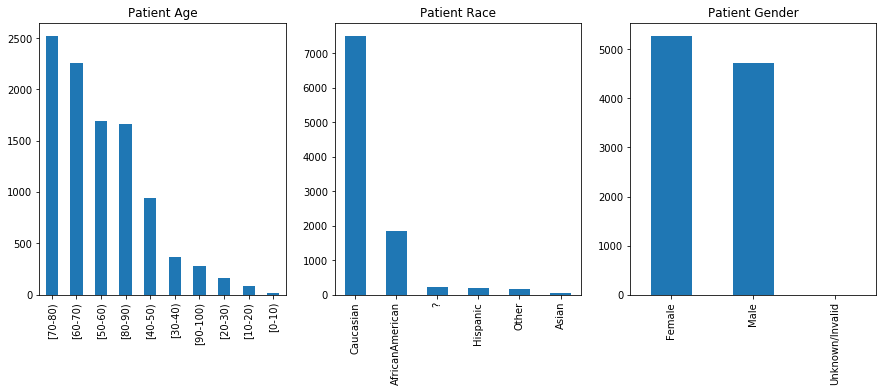

In [4]:
plt.figure(figsize = (15, 5))

print("Summary of Age, Race and Gender")
print("Age percentage \n", diabetes['age'].value_counts()/10000)
print("Race percentage \n", diabetes['race'].value_counts()/10000)
print("Gender percentage \n", diabetes['gender'].value_counts()/10000)

plt.subplot(1, 3, 1)
diabetes['age'].value_counts().plot.bar(title = "Patient Age")

plt.subplot(1, 3, 2)
diabetes['race'].value_counts().plot.bar(title = "Patient Race")

plt.subplot(1, 3, 3)
diabetes['gender'].value_counts().plot.bar(title = "Patient Gender")

### Patient Stay
To get an idea of the typical hospital stay, I have decided to examine the length of stay, the number of lab tests performed and the number of medications given. The average length of stay in the hospital is 4.4 days. The average number of lab tests performed is 43 and the average number of medication given during the stay is 16.  

Average time spent in hospital is 4.3933 days
Average number of lab tests perfomed during stay 43.063
Average number of medications given during stay 15.9997


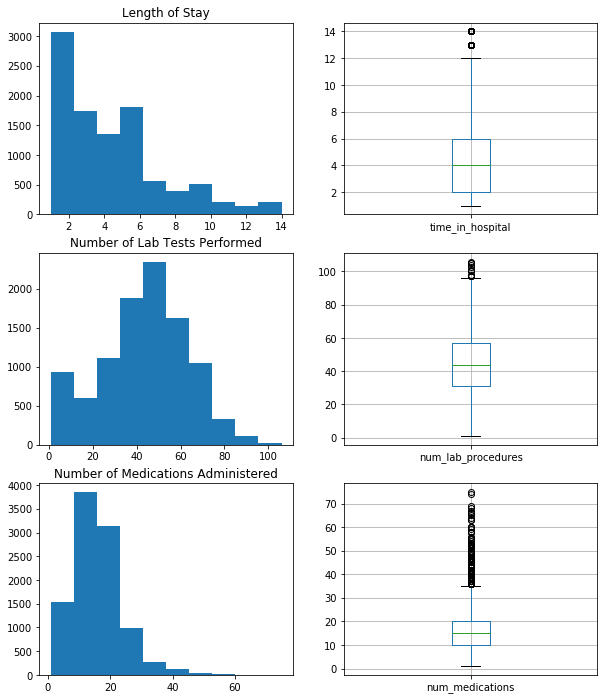

In [6]:
plt.figure(figsize = (10, 12))

plt.subplot(3, 2, 1)
plt.hist(diabetes['time_in_hospital'])
plt.title("Length of Stay")

plt.subplot(3, 2, 2)
diabetes.boxplot(column = 'time_in_hospital')

print('Average time spent in hospital is', np.mean(diabetes.time_in_hospital), 'days')

plt.subplot(3, 2, 3)
plt.hist(diabetes['num_lab_procedures'])
plt.title("Number of Lab Tests Performed")

plt.subplot(3, 2, 4)
diabetes.boxplot(column = 'num_lab_procedures')

print("Average number of lab tests perfomed during stay", np.mean(diabetes.num_lab_procedures))

plt.subplot(3, 2, 5)
plt.hist(diabetes['num_medications'])
plt.title("Number of Medications Administered")

plt.subplot(3, 2, 6)
diabetes.boxplot(column = 'num_medications')

print("Average number of medications given during stay", np.mean(diabetes.num_medications))

### Patient Treatment
Finally, to get a sense of the patient's treatment, I will examine whether diabetes medication was prescribed and also if medication was changed (either the dosage or an actual change in medication). In 76 percent of the encounters diabetes medication was prescribed. Additionally, medication was changed 46 percent of the time.

The percentage of times diabetes medication was prescribed 
 Yes    0.7652
No     0.2348
Name: diabetesMed, dtype: float64
The percentage of times diabetic mediaction was changed 
 No    0.5399
Ch    0.4601
Name: change, dtype: float64


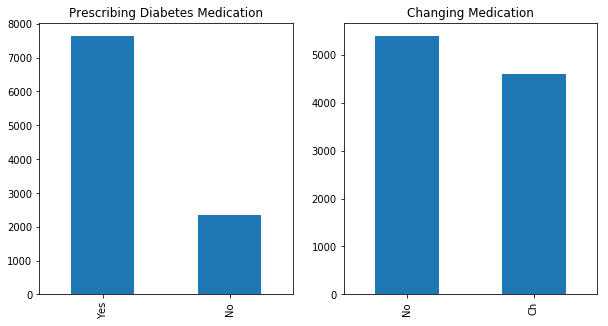

In [7]:
plt.figure(figsize = (10, 5))

plt.subplot(1, 2, 1)
diabetes['diabetesMed'].value_counts().plot.bar(title = "Prescribing Diabetes Medication")
print("The percentage of times diabetes medication was prescribed \n", diabetes['diabetesMed'].value_counts()/10000)

plt.subplot(1, 2, 2)
diabetes['change'].value_counts().plot.bar(title = "Changing Medication")
print("The percentage of times diabetic mediaction was changed \n", diabetes['change'].value_counts()/10000)

## Analytic Questions 
Having explored the data, we will now examine the patient demographics, stay and treatment in further detail. The goal is to find indications within these features that will provide insight into where diabetes treatment is having success, and also where there are shortcomings. The three main questions I will be looking to answer are:
    1. Does race, gender, or age lead to higher or lower readmittance rates?
    2. Does the length of stay, number of lab tests performed or medications given correlate to lower readmittance?
    3. Does prescribing or changing medication have an affect on readmittance rates?
The first step I have decided to take in answering these questions is splitting the data set into two separate sets; one containing the information for patients who were readmitted (for both less than 30 days and greater than 30 days) and the other containing patients who were not readmitted. 

In [8]:
notreadmitted = diabetes.loc[diabetes['readmitted'] == 'NO']

readmitted = diabetes.loc[diabetes['readmitted'] != 'NO']

To answer the first question, I have decided to calculate probabilities of being readmitted given age, race or gender. For age, the probability of being readmitted stays above 42 percent after age 20, and peaks at just over 49 percent multiple times. In terms of race, readmittance is fairly similar for each race. Caucasian's have the highest rate at just under 47 percent while Asians have the lowest readmittance rate at 42 percent. One important note is that the sample contains predominantly Caucasian and African American patients, so probabilities for other races are likely less reliable. Finally, in terms of gender females have a slightly probabilitiy for being readmitted at around 47 percent versus 45 percent for males. After examining the demographics, there doesn't appear to be any statistically significant features that affect readmittance rates as all probabilities are fairly close to one another and close to the total readmittance percentage of 53 percent.  

Probability of being readmitted
 age
[0-10)      0.066667
[10-20)     0.325000
[20-30)     0.496970
[30-40)     0.424731
[40-50)     0.448568
[50-60)     0.426800
[60-70)     0.456233
[70-80)     0.493460
[80-90)     0.493397
[90-100)    0.407143
dtype: float64
Probability of NOT being readmitted
 age
[0-10)      0.933333
[10-20)     0.675000
[20-30)     0.503030
[30-40)     0.575269
[40-50)     0.551432
[50-60)     0.573200
[60-70)     0.543767
[70-80)     0.506540
[80-90)     0.506603
[90-100)    0.592857
dtype: float64


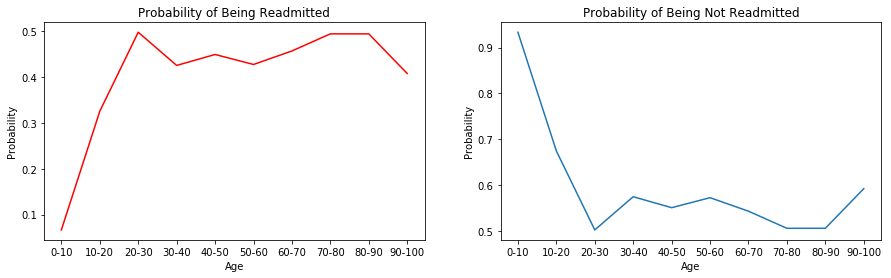

In [9]:
x = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

y_no = (notreadmitted.groupby(['age']).size()/diabetes.groupby(['age']).size()).tolist()

y_yes = (readmitted.groupby(['age']).size()/diabetes.groupby(['age']).size()).tolist()

plt.figure(figsize = (15, 4))

plt.subplot(1, 2, 1)
plt.plot(x, y_yes, color = 'red')
plt.title("Probability of Being Readmitted")
plt.xlabel('Age')
plt.ylabel('Probability')

plt.subplot(1, 2, 2)
plt.plot(x, y_no)
plt.title("Probability of Being Not Readmitted")
plt.xlabel('Age')
plt.ylabel('Probability')


print("Probability of being readmitted\n", readmitted.groupby(['age']).size()/diabetes.groupby(['age']).size())
print("Probability of NOT being readmitted\n", notreadmitted.groupby(['age']).size()/diabetes.groupby(['age']).size())

Probability of being readmitted
 race
?                  0.373874
AfricanAmerican    0.455819
Asian              0.428571
Caucasian          0.467359
Hispanic           0.440594
Other              0.481013
dtype: float64
Probability of NOT being readmitted
 race
?                  0.626126
AfricanAmerican    0.544181
Asian              0.571429
Caucasian          0.532641
Hispanic           0.559406
Other              0.518987
dtype: float64


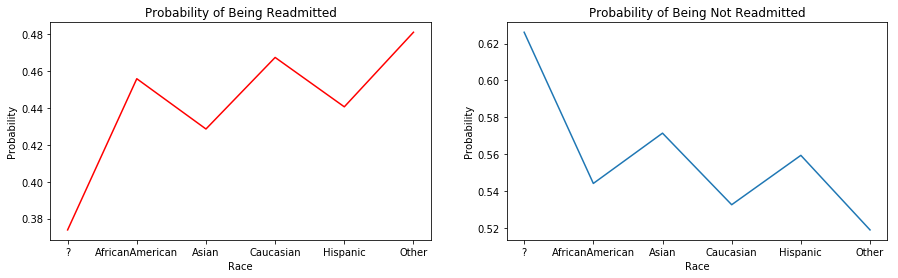

In [10]:
x = ['?', 'AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other']

y_no = (notreadmitted.groupby(['race']).size()/diabetes.groupby(['race']).size()).tolist()

y_yes = (readmitted.groupby(['race']).size()/diabetes.groupby(['race']).size()).tolist()

plt.figure(figsize = (15, 4))

plt.subplot(1, 2, 1)
plt.plot(x, y_yes, color = 'red')
plt.title("Probability of Being Readmitted")
plt.xlabel('Race')
plt.ylabel('Probability')

plt.subplot(1, 2, 2)
plt.plot(x, y_no)
plt.title("Probability of Being Not Readmitted")
plt.xlabel('Race')
plt.ylabel('Probability')

print("Probability of being readmitted\n", readmitted.groupby(['race']).size()/diabetes.groupby(['race']).size())
print("Probability of NOT being readmitted\n", notreadmitted.groupby(['race']).size()/diabetes.groupby(['race']).size())

In [11]:
print("Probability of being readmitted\n", readmitted.groupby(['gender']).size()/diabetes.groupby(['gender']).size())
print("Probability of NOT being readmitted\n", notreadmitted.groupby(['gender']).size()/diabetes.groupby(['gender']).size())

Probability of being readmitted
 gender
Female             0.472417
Male               0.451736
Unknown/Invalid         NaN
dtype: float64
Probability of NOT being readmitted
 gender
Female             0.527583
Male               0.548264
Unknown/Invalid    1.000000
dtype: float64


I will now look to see how the patient's hospital stay affects readmission by first looking at the length of the stay. 

Probability of being readmitted
 time_in_hospital
1     0.388125
2     0.438534
3     0.459026
4     0.503715
5     0.486071
6     0.523438
7     0.465116
8     0.481297
9     0.508897
10    0.467249
11    0.492611
12    0.405594
13    0.429907
14    0.519231
dtype: float64
Probability of NOT being readmitted
 time_in_hospital
1     0.611875
2     0.561466
3     0.540974
4     0.496285
5     0.513929
6     0.476562
7     0.534884
8     0.518703
9     0.491103
10    0.532751
11    0.507389
12    0.594406
13    0.570093
14    0.480769
dtype: float64


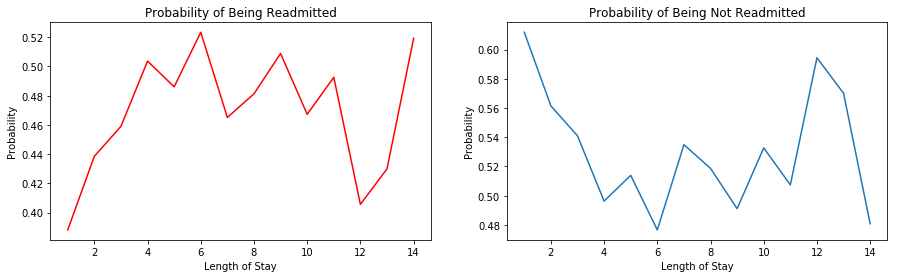

In [12]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

y_no = (notreadmitted.groupby(['time_in_hospital']).size()/diabetes.groupby(['time_in_hospital']).size()).tolist()

y_yes = (readmitted.groupby(['time_in_hospital']).size()/diabetes.groupby(['time_in_hospital']).size()).tolist()

plt.figure(figsize = (15, 4))

plt.subplot(1, 2, 1)
plt.plot(x, y_yes, color = 'red')
plt.title("Probability of Being Readmitted")
plt.xlabel('Length of Stay')
plt.ylabel('Probability')

plt.subplot(1, 2, 2)
plt.plot(x, y_no)
plt.title("Probability of Being Not Readmitted")
plt.xlabel('Length of Stay')
plt.ylabel('Probability')

print("Probability of being readmitted\n", readmitted.groupby(['time_in_hospital']).size()/diabetes.groupby(['time_in_hospital']).size())
print("Probability of NOT being readmitted\n", notreadmitted.groupby(['time_in_hospital']).size()/diabetes.groupby(['time_in_hospital']).size())

Average time spent in hospital and readmitted is 4.528318201469952 days
Standard deviation is 2.9408636950258304
Average time spent in hospital and not readmitted is 4.277074804614812 days
Standard deviation is 2.995606372547925


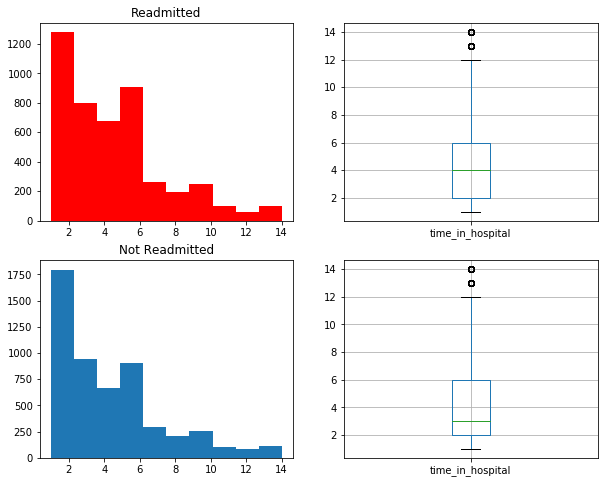

In [13]:
plt.figure(figsize = (10, 8))

plt.subplot(2, 2, 1)
plt.hist(readmitted['time_in_hospital'], color = 'red')
plt.title("Readmitted")

plt.subplot(2, 2, 2)
readmitted.boxplot(column = 'time_in_hospital')

print('Average time spent in hospital and readmitted is', np.mean(readmitted.time_in_hospital), 'days')
print("Standard deviation is", np.std(readmitted.time_in_hospital))

plt.subplot(2, 2, 3)
plt.hist(notreadmitted['time_in_hospital'])
plt.title("Not Readmitted")

plt.subplot(2, 2, 4)
notreadmitted.boxplot(column = 'time_in_hospital')

print('Average time spent in hospital and not readmitted is', np.mean(notreadmitted.time_in_hospital), 'days')
print("Standard deviation is", np.std(notreadmitted.time_in_hospital))

Examining the data for patients who are readmitted and those who are not in terms of the length of stay, we see that in general after day 4, the probability that a patient will be readmitted remains above 46 percent (except for stays of 12 or 13 days where the probability decreases to 40 and 43 percent respectively). This peaks at about a 52 percent probability for patients who stay six days. This does seem to be an area of concern because the longer a patient stays in the hospital, the goal should be to decrease the likelihood of being readmitted and after days 12 and 13 the probability increases back to 52 percent. In fact, the average length of stay for patients who are readmitted is longer than for patients who are not readmitted. 

Average number of lab tests performed and readmitted 44.06139213143104
Standard deviation is 19.56629050957145
Average number of lab tests performed and not readmitted 42.20357275772237
Standard deviation is 20.302903901864706


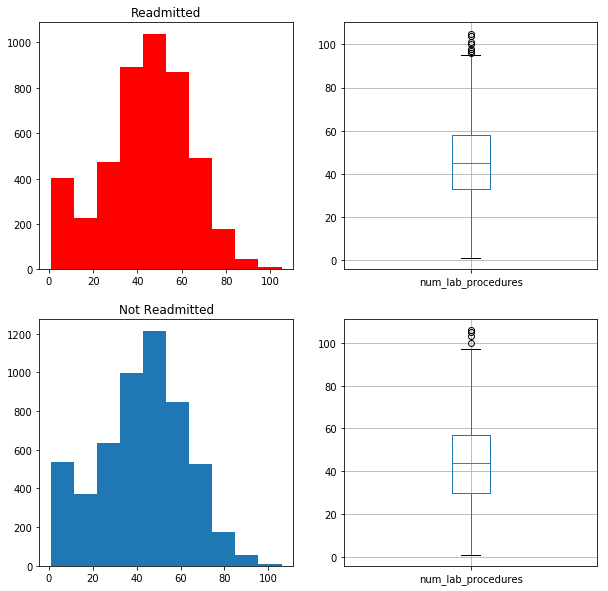

In [14]:
plt.figure(figsize = (10, 10))

plt.subplot(2, 2, 1)
plt.hist(readmitted['num_lab_procedures'], color = 'red')
plt.title("Readmitted")

plt.subplot(2, 2, 2)
readmitted.boxplot(column = 'num_lab_procedures')

print('Average number of lab tests performed and readmitted', np.mean(readmitted.num_lab_procedures))
print("Standard deviation is", np.std(readmitted.num_lab_procedures))

plt.subplot(2, 2, 3)
plt.hist(notreadmitted['num_lab_procedures'])
plt.title("Not Readmitted")

plt.subplot(2, 2, 4)
notreadmitted.boxplot(column = 'num_lab_procedures')

print('Average number of lab tests performed and not readmitted', np.mean(notreadmitted.num_lab_procedures))
print("Standard deviation is", np.std(notreadmitted.num_lab_procedures))

In terms of the number of lab tests that are performed per stay, the averages are pretty similar. Readmitted patients undergo just over 44 lab tests on average while patients who are not readmitted average just under 43. To me this seems to indicate two things. First, there is likely a standard procedure in place and each patient undergoes the same tests, but also that the results from these tests don't seem to be correlating to better patient outcomes.   

Average number of medications administered during admission and readmitted 16.248378728923477
Standard deviation is 7.490065662135347
Average number of medications administered during admission and not readmitted 15.785634536657982
Standard deviation is 8.659491770724618


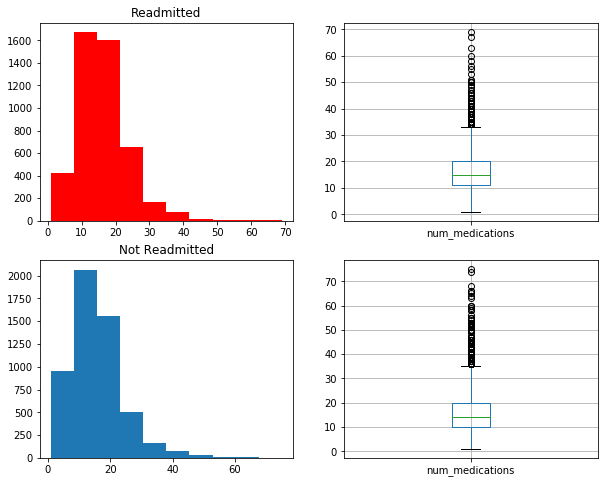

In [15]:
plt.figure(figsize = (10, 8))

plt.subplot(2, 2, 1)
plt.hist(readmitted['num_medications'], color = 'red')
plt.title("Readmitted")

plt.subplot(2, 2, 2)
readmitted.boxplot(column = 'num_medications')

print('Average number of medications administered during admission and readmitted', np.mean(readmitted.num_medications))
print("Standard deviation is", np.std(readmitted.num_medications))

plt.subplot(2, 2, 3)
plt.hist(notreadmitted['num_medications'])
plt.title("Not Readmitted")

plt.subplot(2, 2, 4)
notreadmitted.boxplot(column = 'num_medications')

print('Average number of medications administered during admission and not readmitted', np.mean(notreadmitted.num_medications))
print("Standard deviation is", np.std(notreadmitted.num_medications))

Similar to the number of lab tests performed, the average number of medications given does not seem to vary much between patients who are readmitted and those who are not. This leads me to a similar conclusion that most of the treatments are standardized (although there are more outliers), but not necessarily correlated with better patient outcomes. 

The last question I would like to answer pertains to the patient's treatment. I want to examine if changing a patient's medication or prescribing medication leads to lower readmittance rates. I will again calculate probabilities to assess the effectiveness of treatment. 

Probability of NOT being readmitted
 diabetesMed
No     0.595826
Yes    0.519472
dtype: float64
Probability of being readmitted
 diabetesMed
No     0.404174
Yes    0.480528
dtype: float64


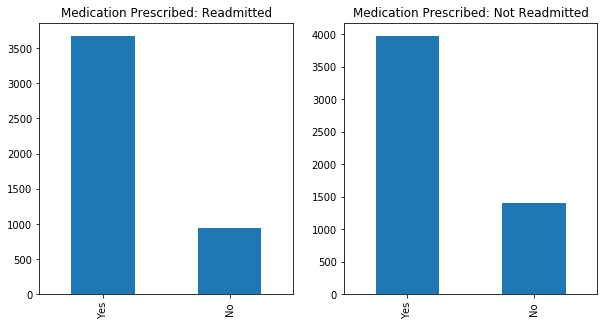

In [16]:
# Indicates if there was any diabetic medication prescribed. Values: “yes” and “no"
plt.figure(figsize = (10, 5))

plt.subplot(1, 2, 1)
readmitted['diabetesMed'].value_counts().plot.bar(title = "Medication Prescribed: Readmitted")

plt.subplot(1, 2, 2)
notreadmitted['diabetesMed'].value_counts().plot.bar(title = "Medication Prescribed: Not Readmitted")

print("Probability of NOT being readmitted\n", notreadmitted.groupby(['diabetesMed']).size()/diabetes.groupby(['diabetesMed']).size())
print("Probability of being readmitted\n", readmitted.groupby(['diabetesMed']).size()/diabetes.groupby(['diabetesMed']).size())

First is a look at whether or not medication was prescribed during the stay. The bar charts show us that more often than not, medication is prescribed. When this occurs, patients have a probability of being readmitted just over 48 percent of the time. This seems to be a very high and calls into question the effectiveness of the medication being prescribed.  When medication is not prescribed, patients have a probability of being readmitted just over 40 percent of the time. Even though this is a lower probability, it could be that these patients are in better shape to begin with since no medication is being prescribed. 

Probability of NOT being readmitted
 change
Ch    0.508585
No    0.561956
dtype: float64
Probability of being readmitted
 change
Ch    0.491415
No    0.438044
dtype: float64


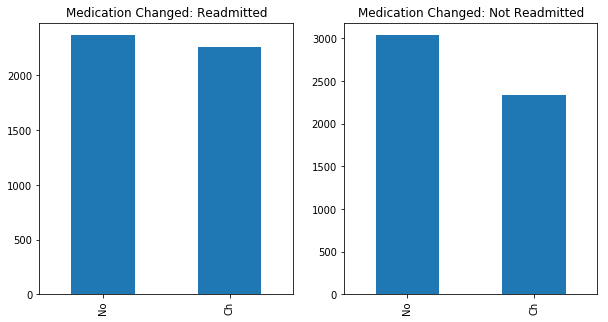

In [17]:
plt.figure(figsize = (10, 5))

plt.subplot(1, 2, 2)
notreadmitted['change'].value_counts().plot.bar(title = "Medication Changed: Not Readmitted")

plt.subplot(1, 2, 1)
readmitted['change'].value_counts().plot.bar(title = "Medication Changed: Readmitted")

print("Probability of NOT being readmitted\n", notreadmitted.groupby(['change']).size()/diabetes.groupby(['change']).size())
print("Probability of being readmitted\n", readmitted.groupby(['change']).size()/diabetes.groupby(['change']).size())

Next, I found the probability of being readmitted or not when medication is changed, either dosage or an actual change in medication. Unlike with prescribing medication, changing medication happens less often than not. When medication is changed the probability of being readmitted is close to 50 percent. When medication is not changed, the probability of being readmitted is 44 percent. These probabilities, along with the probabilities above indicate that patient treatment, in terms of prescribing or  changing medication, does not have a strong correlation with lowering readmittance. 

## Conclusions and Further Research
Overall, the data has provided numerous insights into diabetes treatment. The data shows that patients are readmitted greater than 45 percent of the time indicating there is a need for better treatment to improve patient outcomes. There appears to be little evidence that age, race or gender significantly affect readmittance rates. There also does not appear to be a strong correlation between the features of a patient's stay or their treatment that significantly decreases the likelihood of being readmitted. Although this does not provide us with any specific factors of treatments for hospitals and caretakers to focus on as hoped, it does show that there is room for improvement and further research. One aspect of this data set that I did not examine as of yet was the 20+ medications that were listed. It could be worth while to dig into each one of these medications and find which drugs, that when administered lead to a lower probability of readmittance. Additionally, it would be beneficial to build out classification models such as a logistic regression or a random forest that can predict readmittance and identify combinations of factors that lead to the best patient outcomes.   